# MS1MV2 Preparation and EDA

### Dataset Structure Transformation

The data in this dataset is currently structured as follows:

```text
ms1mv2/
  ├── 0/
  │    ├── 1.jpg
  │    ├── 2.jpg
  │    ├── 3.jpg
  │    └── ...
  ├── 1/
  │    ├── 111.jpg
  │    ├── 112.jpg
  │    └── ...

we will turn it into:
Images/
  |--1.jpg
  |--2.jpg
  |--3.jpg
  |--...

and a labels.csv file that holds the labels



Data source: https://www.kaggle.com/datasets/yakhyokhuja/ms1m-arcface-dataset/data

In [14]:
import os, pandas as pd, shutil, matplotlib.pyplot as plt, numpy as np

In [15]:
data_path = os.path.join('..', 'data', 'datasets', 'face recognition', 'ms1mv2')
os.path.exists(data_path)

True

In [16]:
os.makedirs(os.path.join(data_path, 'Images'), exist_ok = True) # Make the directory where all the images will be moved

In [17]:
def sort_jpg_files(files):
    new_files = []
    for file in files:
        image_name = file.split('.')[0]
        new_files.append(int(image_name))
    
    sorted_idx = np.argsort(new_files)
    files = [files[i] for i in sorted_idx]

    return files

In [21]:
length = len(os.listdir(data_path)) - 1
filenames = []
labels = []
for i in range(length):
    for file in sort_jpg_files(os.listdir(os.path.join(data_path, str(i)))):
        filenames.append(file)
        labels.append(i)

        shutil.move(os.path.join(data_path, str(i), file), os.path.join(data_path, 'Images', file))

    os.rmdir(os.path.join(data_path, str(i)))

labels_df = pd.DataFrame({'filename' : filenames, 'label' : labels})

In [22]:
labels_df.to_csv(os.path.join(data_path, 'labels.csv'), index = False)

## EDA

In [23]:
labels = pd.read_csv(os.path.join(data_path, 'labels.csv'))

In [24]:
print(f"Total dataset length: {len(labels)}")

Total dataset length: 5822653


In [25]:
print(f'Total number of classes: {len(labels.label.unique())}')

Total number of classes: 85742


In [27]:
classes, counts = np.unique(labels.label, return_counts = True)
sorted = np.argsort(counts)
counts = counts[sorted]

In [28]:
print(f'Min class Images: {np.min(counts)}')
print(f'Max class Images: {np.max(counts)}')

Min class Images: 2
Max class Images: 602


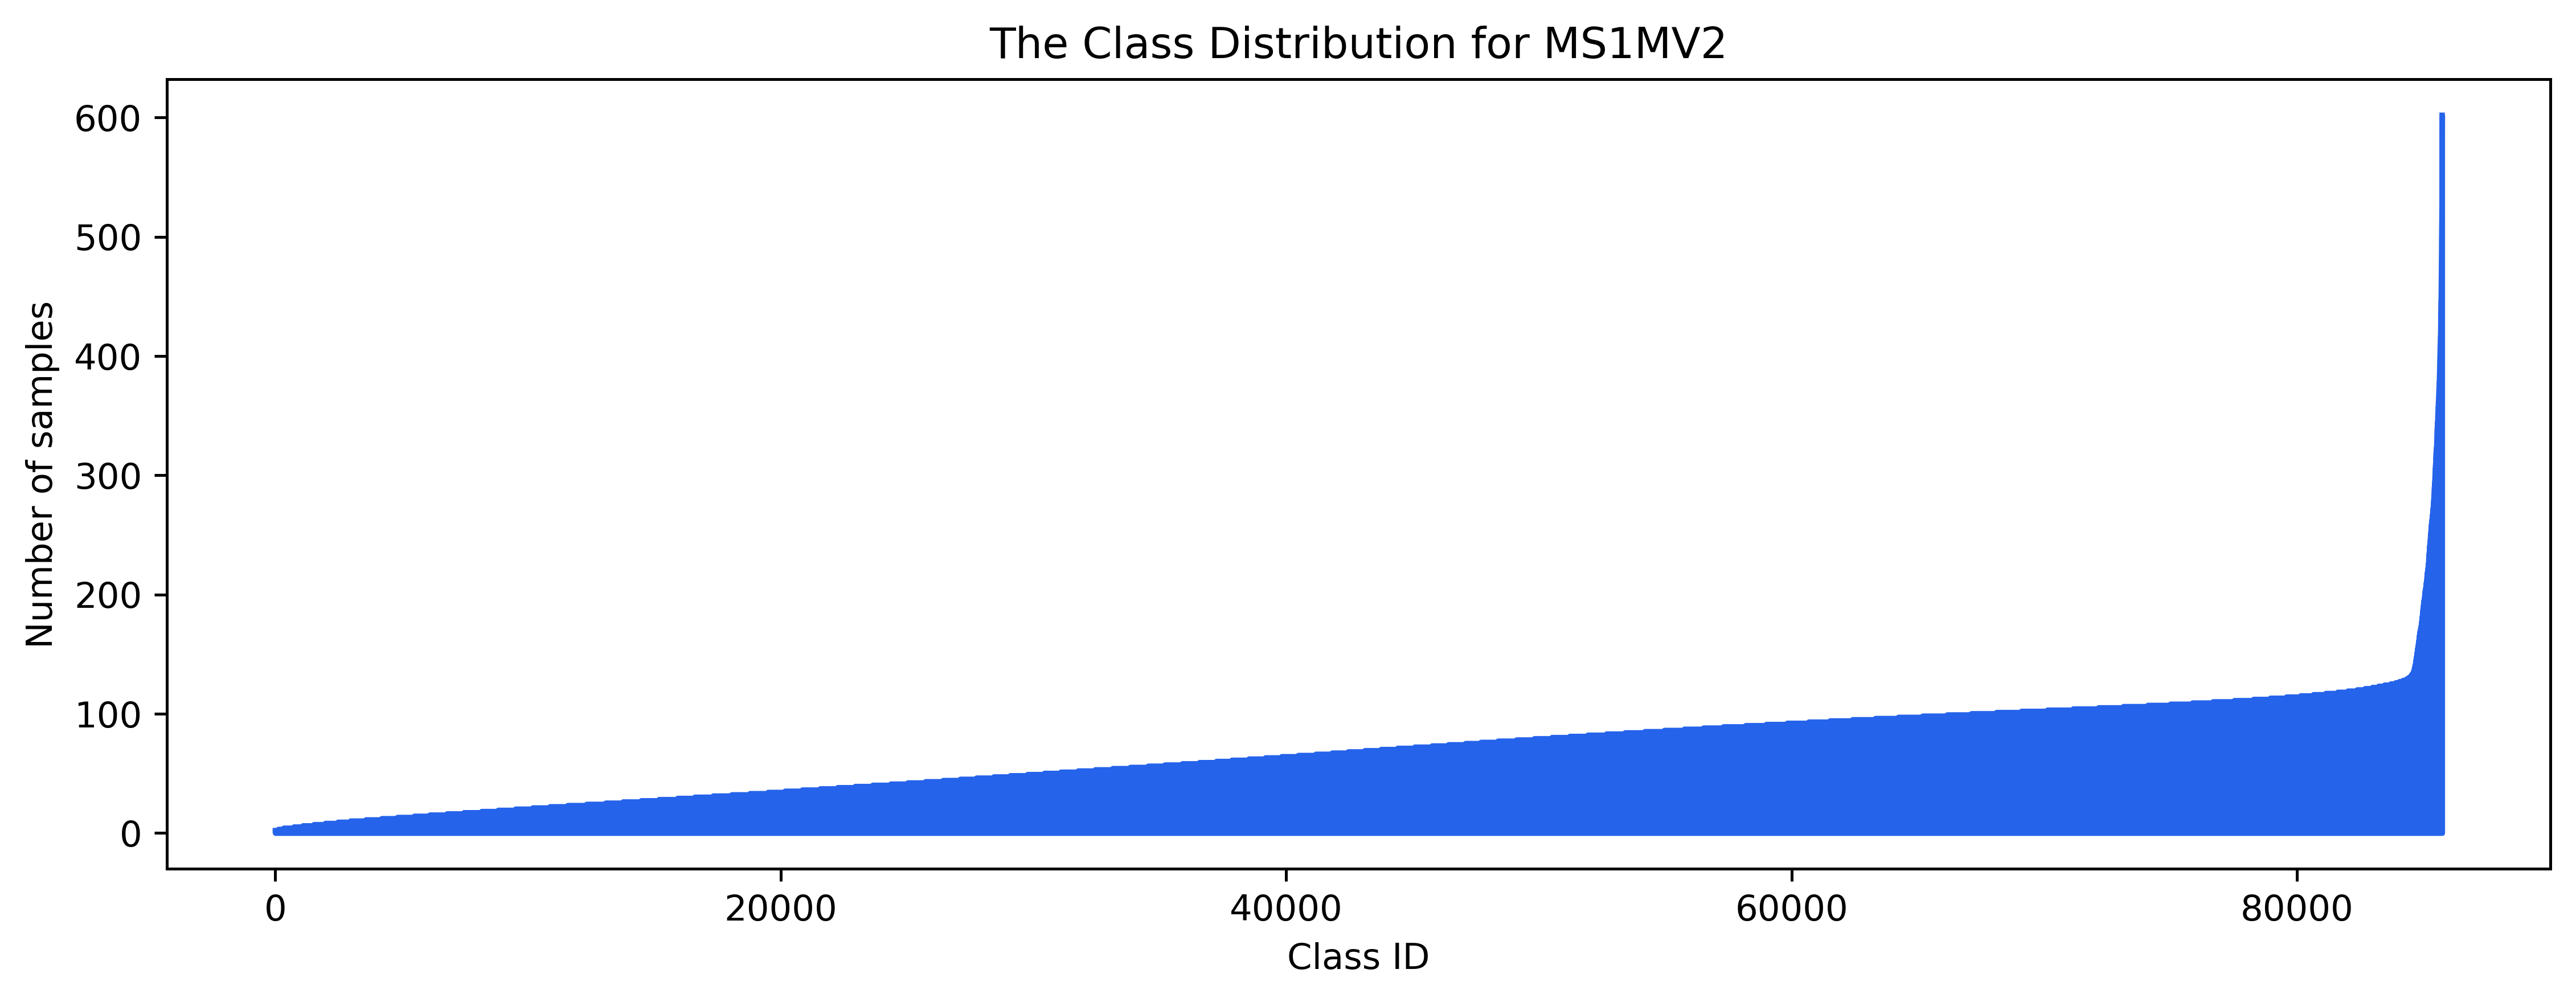

In [ ]:
plt.figure(figsize = (12, 4), dpi = 450)
plt.plot(classes, counts, color = "#2563eb")
plt.fill_between(classes, counts, color = "#2563eb", linewidth = 1.5)
plt.title('The Class Distribution for MS1MV2')
plt.xlabel('Class ID')
plt.ylabel('Number of samples')
plt.savefig(
    os.path.join('..', 'data', 'figures', 'Face Recognition', 'MS1MV2', 'The Class Distribution for MS1MV2')
)
plt.show()

In [30]:
sample_images = []
sample_labels = []
for i in range(4): # choose 4 random classes
    class_idx = np.random.randint(low = 0, high = len(labels.label.unique()))
    class_labels = labels[labels['label'] == class_idx]

    while len(class_labels) < 4: # Make sure the chosen class has at least 4 images
            class_idx = np.random.randint(low = 0, high = len(labels.label.unique()))
            class_labels = labels[labels['label'] == class_idx]
            
    indices = []
    for j in range(4): # choose 4 random images within the class
        idx = np.random.randint(low = 0, high = len(class_labels))
        
        while idx in indices: # Make sure the chosen image hasn't been chosen before
            idx = np.random.randint(low = 0, high = len(class_labels))

        filename = class_labels.iloc[idx]['filename']
        label = class_labels.iloc[idx]['label']
        indices.append(idx)
        sample_images.append(filename)
        sample_labels.append(label)

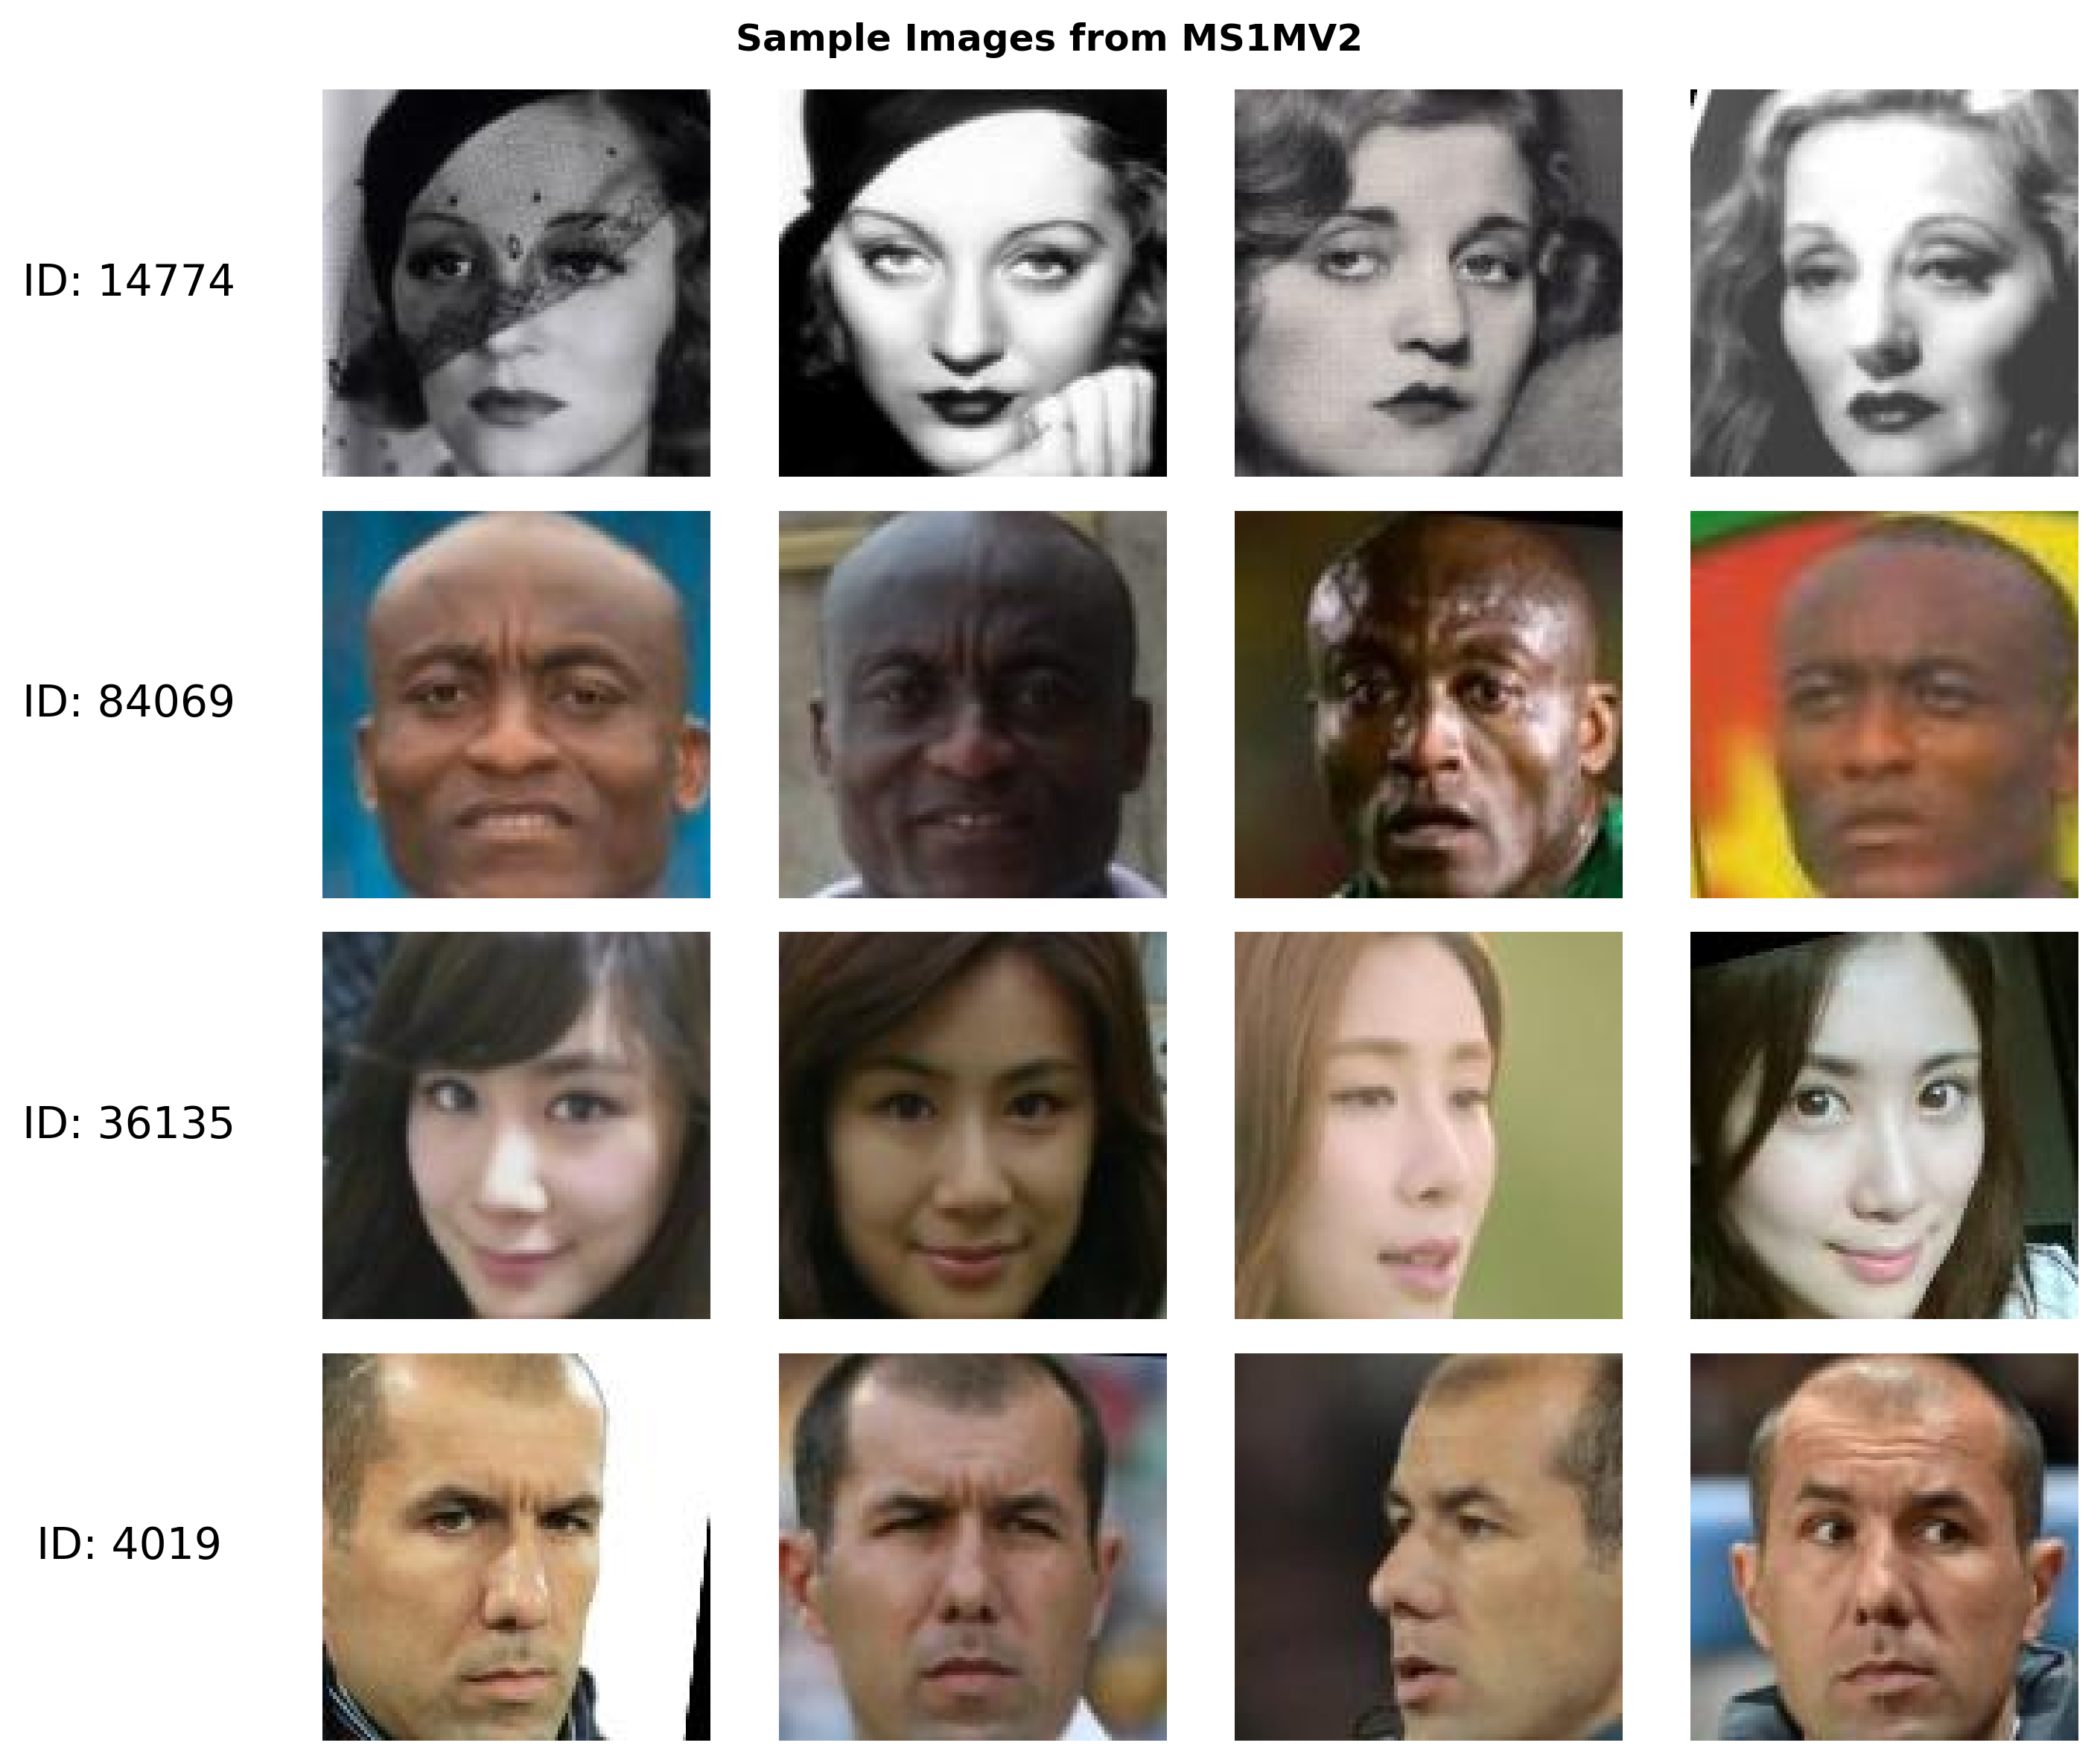

In [31]:
fig, axes = plt.subplots(4, 4, figsize = (10, 8), dpi = 300)
fig.set_dpi(300)
fig.suptitle('Sample Images from MS1MV2', fontweight = 'bold')
for i in range(4):
    first_ax = axes[i, 0]

    first_ax.text(
    -0.5, 0.5, f'ID: {sample_labels[i * 4]}',
    transform = first_ax.transAxes,
    va = 'center',
    ha = 'center',
    rotation = 'horizontal',
    fontsize = 14,
    )

    for j in range(4):
        ax = axes[i, j]
        image = plt.imread(os.path.join(data_path, 'Images', sample_images[i * 4 + j]))
        ax.imshow(image)
        ax.axis('off')
plt.tight_layout()
plt.subplots_adjust(left = 0.15)
plt.savefig(
    os.path.join('..', 'data', 'figures', 'Face Recognition', 'MS1MV2', 'Sample Images from MS1MV2')
)
plt.show()